## Import Packages

In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

## Calibrate the Camera

**We will use a 9x6 chess board to calibrate it:**

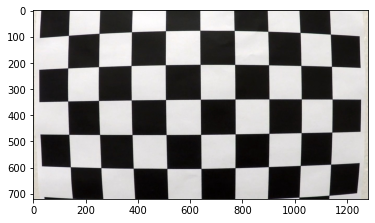

In [4]:
#reading in an calibration image

img = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

In [24]:
import glob

# Read image list
images = glob.glob('camera_cal/calibration*.jpg')


objpoints = [] 
imgpoints = [] 


objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2) # x,y coodinates


for fname in images:
    #read in each image
    img = mpimg.imread(fname)
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        undist = cv2.undistort(img, mtx, dist, None, mtx)
        
        # draw and detect the image
        # img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        # cv2.imwrite('output_camera_cal/'+fname,undist)
        #plt.imshow(undist)

KeyboardInterrupt: 

## Now lets Sobel transform in the test images

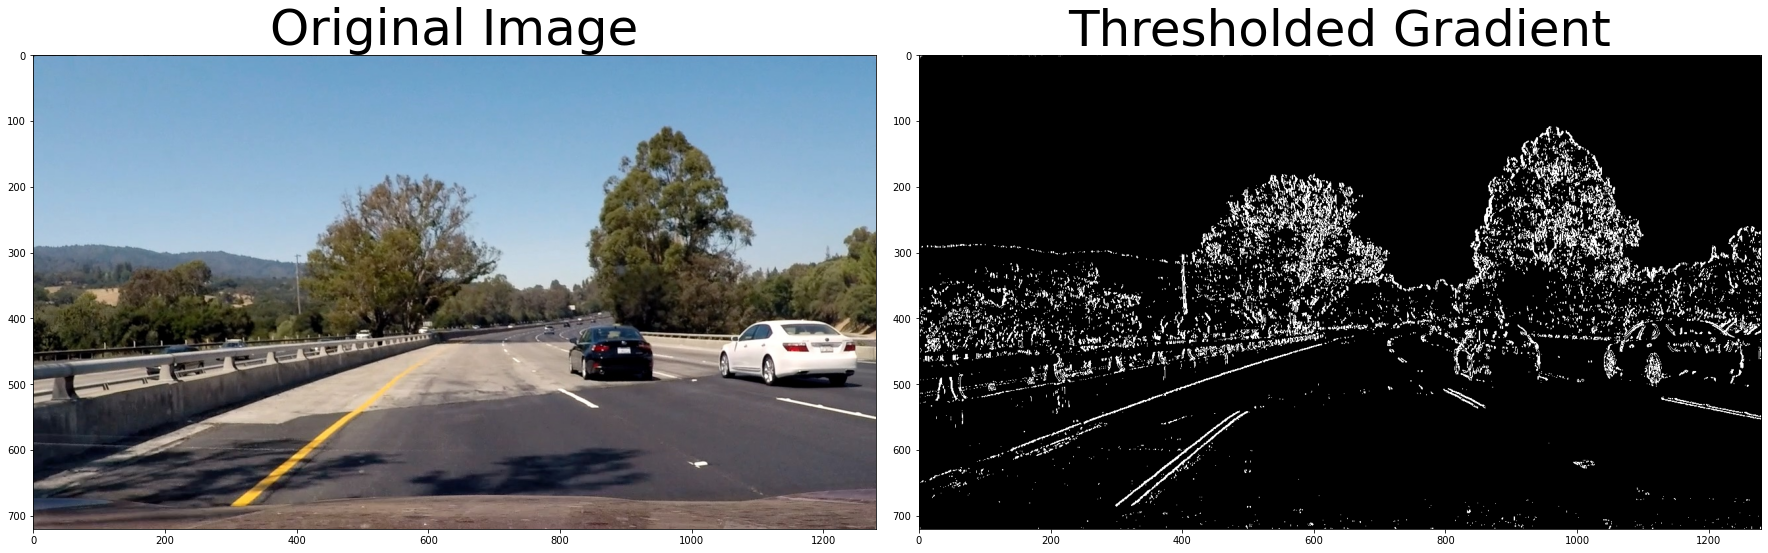

In [5]:
# Read in an image and grayscale it ##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
image = mpimg.imread('test_images/test4.jpg')
def abs_sobel_thresh(img, orient, mag_thresh):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1

    return binary_output
    
# Run the function


grad_binary = abs_sobel_thresh(image,'x', (20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Lets take Magnitude of the Gradient

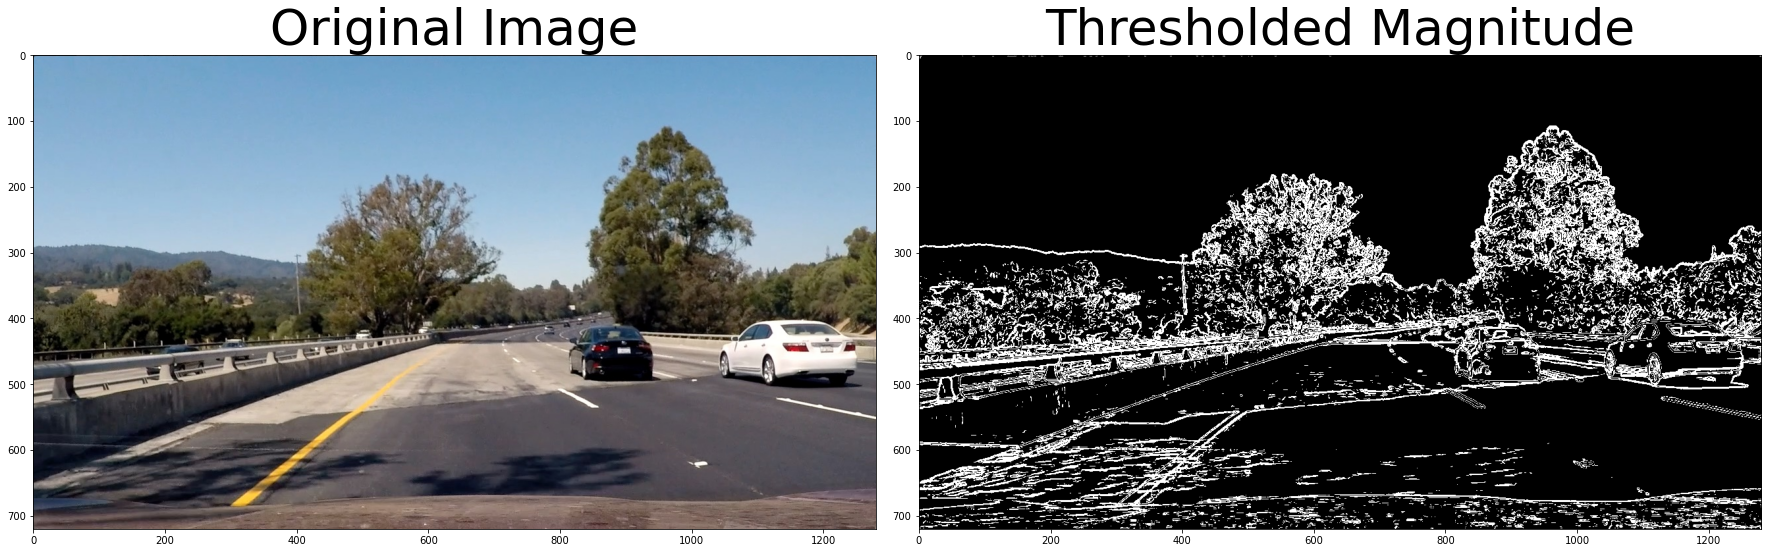

In [6]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def mag_thresh(img, sobel_kernel, mag_thresh):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, 3, (20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Lets take take the direction of the gradient

In [7]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    2binary_output =  np.zeros_like(absgraddir)
    2binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return 2binary_output
    
# Run the function
dir_binary = dir_threshold(image, 15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

SyntaxError: invalid syntax (<ipython-input-7-96c3036d0d0c>, line 9)

## Now lets combine all the Thresholds

In [ ]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image,'x', (20, 150))
grady = abs_sobel_thresh(image,'y', (20, 150))

mag_binary = mag_thresh(image, 3, (170, 255))
dir_binary = dir_threshold(image, 3, thresh=(0.7, 1.3))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Now let's explore the color spaces

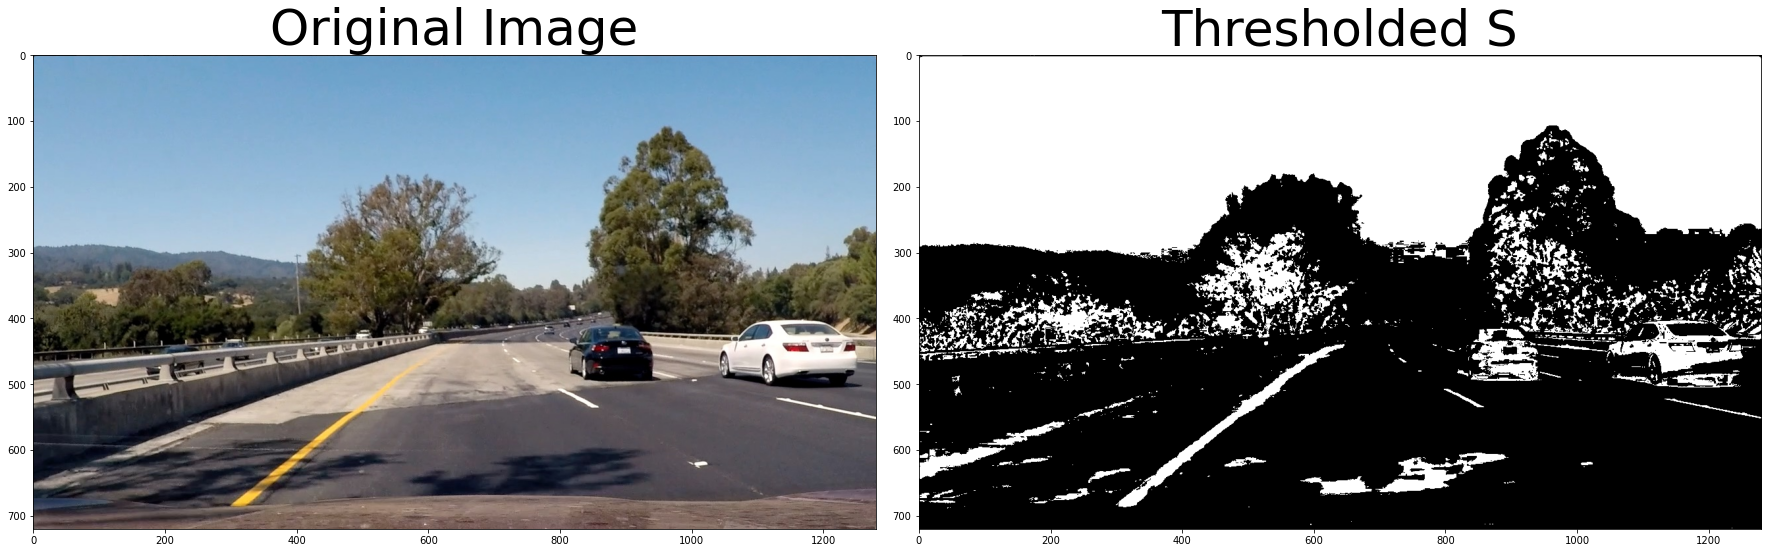

In [8]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, (90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Now lets combine the color and gradient

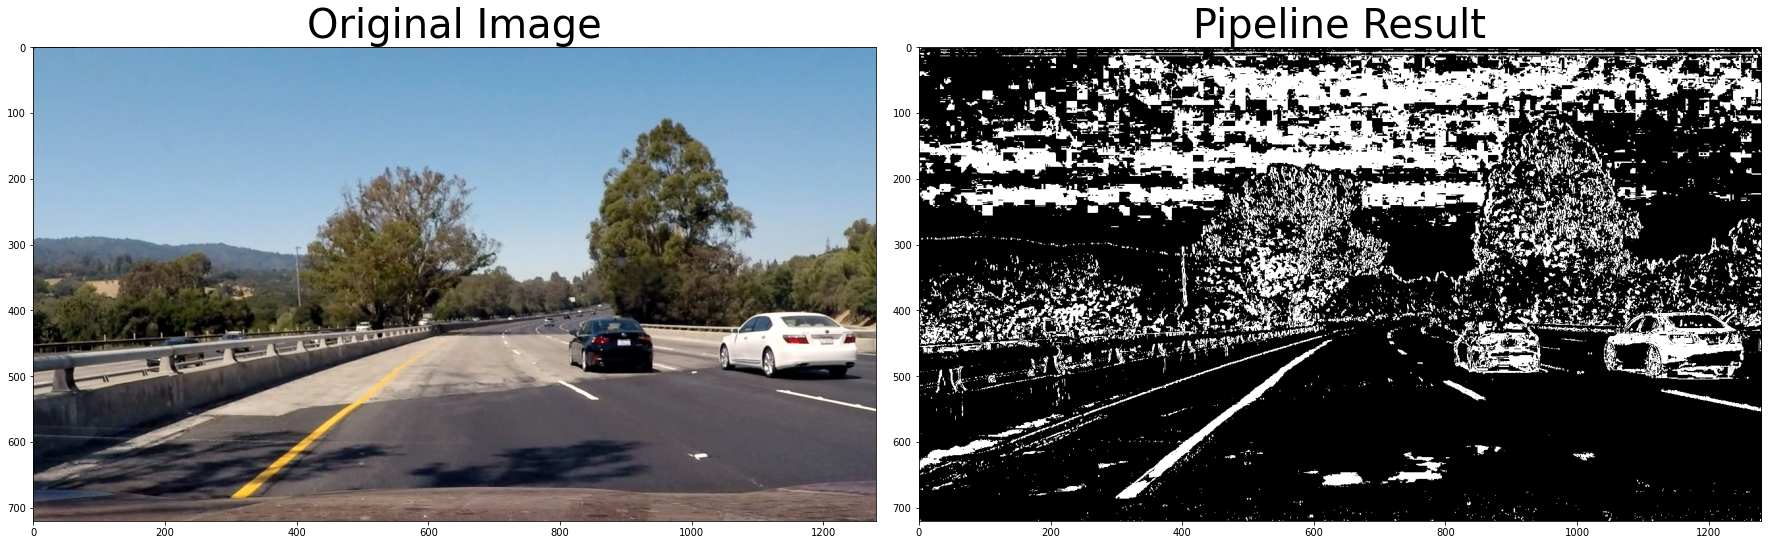

In [9]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(120, 255), sx_thresh=(20, 120)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Warp image

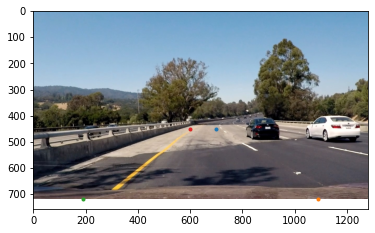

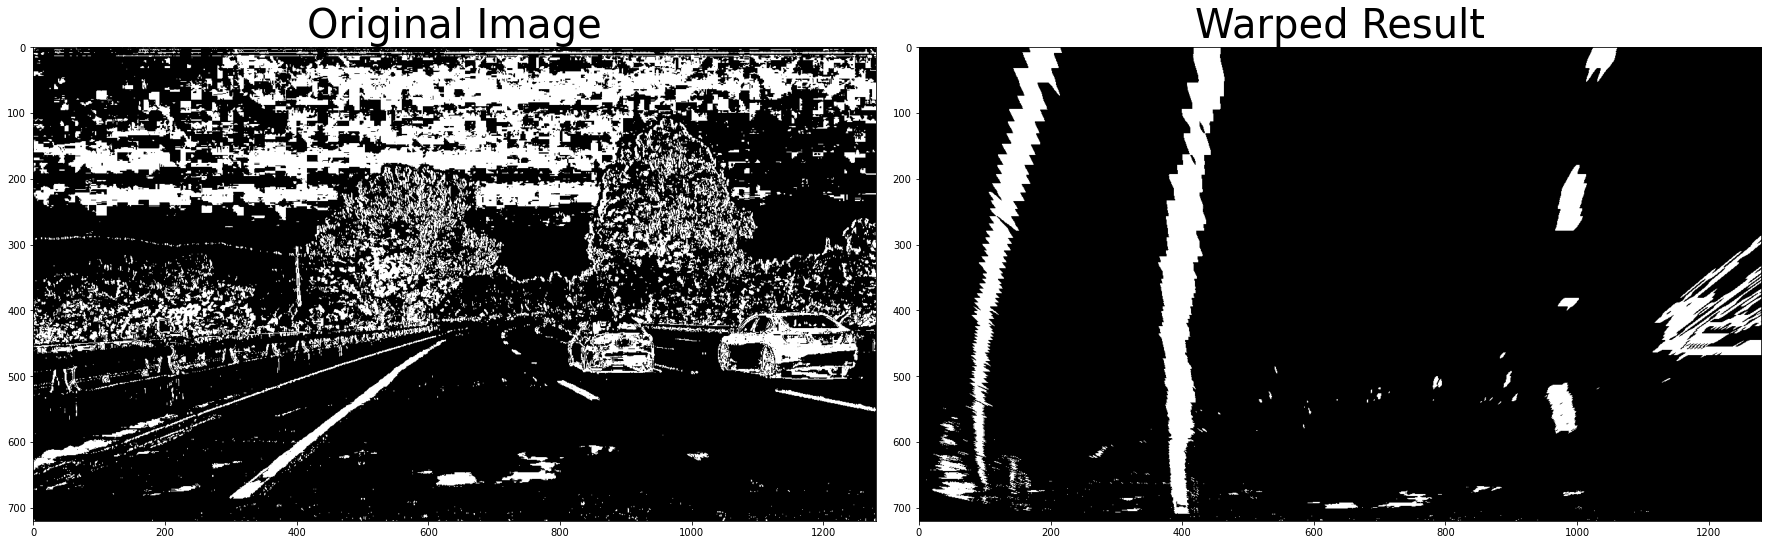

In [10]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
plt.imshow(image)
plt.plot(700, 450, '.')  # top right
plt.plot(1090, 720, '.') # bottom right
plt.plot(190, 720, '.')  # bottom left
plt.plot(600, 450, '.')  # top left

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.float32(
        [[700, 450],
        [1090, 720],
        [190, 720],
        [600, 450]])
    #     X ,  Y
    
    dst = np.float32(
        [[930, 20], 
        [930, 720],
        [350, 720], 
        [350, 20]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    # To undo the warp
    # M = cv2.getPerspectiveTransform(dst, src)
    warped =  cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped



def unwarp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.float32(
        [[700, 450],
        [1090, 720],
        [190, 720],
        [600, 450]])
    #     X ,  Y
    
    dst = np.float32(
        [[930, 20], 
        [930, 720],
        [350, 720], 
        [350, 20]])
    
    M = cv2.getPerspectiveTransform(dst, src)
    # To undo the warp
    unwarped =  cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return unwarped


warped_image = warp(result)
    
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(result, cmap='gray')
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(warped_image, cmap='gray')
ax2.set_title('Warped Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    

## Let's Locate the Lane Lines

Lane finding peaks in the below histogram

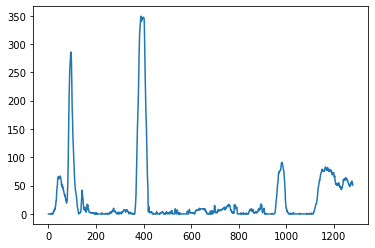

In [11]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = np.sum(warped_image[warped_image.shape[0]//2:,:], axis=0)

# Visualize the resulting histogram
plt.plot(histogram)

## Implement Sliding Windows and Fit a Polynomial

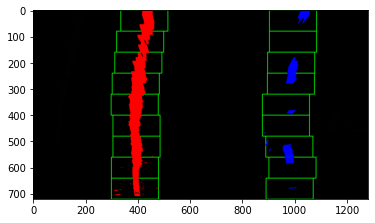

In [12]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
binary_warped = warped_image

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 90
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    #print(left_fit)
    return out_img, left_fit, right_fit

img_result, left_fit_result, right_fit_result = fit_polynomial(binary_warped)

out_img = img_result

plt.imshow(out_img)

## Fit Polynomial

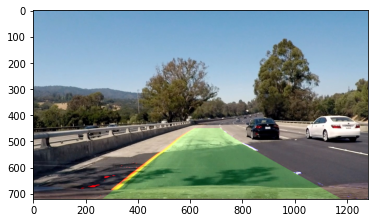

In [13]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE


binary_warped = warped_image

left_fit = left_fit_result
right_fit = right_fit_result

def fit_poly(img_shape, leftx, lefty, rightx, righty):

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])

    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    

    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    
    
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    color_warp[lefty, leftx] = [255, 0, 0]
    color_warp[righty, rightx] = [0, 0, 255]
    
    
    #Highlight the points between the lines
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,55, 0))
        
    
    
    blank_unwarp =  unwarp(color_warp)
    img2 = np.zeros_like(image)
    img2[:,:,:] = blank_unwarp
    img2[:,:,:] = blank_unwarp
    img2[:,:,:] = blank_unwarp
    
    
    #plt.imshow(img2)
    
    result_unwarped = cv2.addWeighted(blank_unwarp, 1, image, 1.0, 0)
            
    cv2.fillPoly(window_img, np.int_([pts]), (0,255, 0))
    
    # highlight edges
    # cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    # cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    
    
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    # plt.plot(left_fitx, ploty, color='yellow')
    # plt.plot(right_fitx, ploty, color='yellow')
    
    ## End visualization steps ##
    return result, result_unwarped, ploty, left_fitx, right_fitx

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits

result_img_warped, result_img_unwarped, ploty, left_fitx, right_fitx = search_around_poly(binary_warped)

# View your output
# plt.imshow(result_img_warped)
plt.imshow(result_img_unwarped)

## Calculate the radius of curvature

In [15]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def generate_data(ym_per_pix, xm_per_pix):
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # Set random seed number so results are consistent for grader
    # Comment this out if you'd like to see results on different random data!
    # np.random.seed(0)
    # Generate some fake data to represent lane-line pixels
    # ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    # quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    # leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
    #                                for y in ploty])
    # rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
    #                                for y in ploty])
    
    
    # leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    # rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

    # Fit a second order polynomial to pixel positions in each fake lane line
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    
    
    return ploty, left_fit_cr, right_fit_cr
    
def measure_curvature_real():
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
       
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    ploty, left_fit_cr, right_fit_cr = generate_data(ym_per_pix, xm_per_pix)
    
    # left_fit_cr, right_fit_cr = left_fit, right_fit
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    return left_curverad, right_curverad


# Calculate the radius of curvature in meters for both lane lines
left_curverad, right_curverad = measure_curvature_real()

print(left_curverad, 'm', right_curverad, 'm')

787.7508354633587 m 532.0871038570394 m


## Consolidated Output

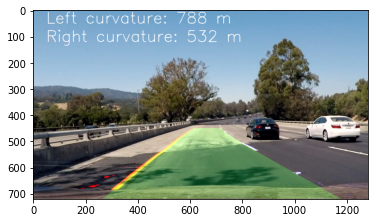

In [16]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def pipelinefinal(img):
    
    fontScale=2
    
    #Apply Sobel
    result = pipeline(img)
    
    #Warp Image
    warped_image = warp(result)
    
    #Mark Lanes
    img_result, left_fit_result, right_fit_result = fit_polynomial(warped_image)
    result_img_warped, result_img_unwarped, ploty, left_fitx, right_fitx = search_around_poly(warped_image)
    
    # Calculate the radius of curvature in meters for both lane lines
    left_curverad, right_curverad = measure_curvature_real()
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontColor = (255, 255, 255)
    cv2.putText(result_img_unwarped,'Left curvature: {:.0f} m'.format(left_curverad), (50, 50), font, fontScale, fontColor, 2)
    cv2.putText(result_img_unwarped,'Right curvature: {:.0f} m'.format(right_curverad), (50, 120), font, fontScale, fontColor, 2)
    
    
    return result_img_unwarped

wrap_result = pipelinefinal(image)

plt.imshow(wrap_result)

## Applying to Videos

In [39]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML


white_output = 'test_videos_output/Output_solidYellowLeft.mp4'

## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("test_videos/solidYellowLeft.mp4").subclip(0,5)
#clip1 = VideoFileClip("test_videos/solidYellowLeft.mp4")
#white_clip = clip1.fl_image(pipelinefinal) #NOTE: this function expects color images!!
white_clip = clip1.fl_image(pipelinefinal)
%time white_clip.write_videofile(white_output, audio=False)

t:   3%|▎         | 4/125 [00:00<00:03, 38.46it/s, now=None]

Moviepy - Building video test_videos_output/Output_solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/Output_solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/Output_solidYellowLeft.mp4
Wall time: 4.02 s
